<div style="background-image: url('https://img.lovepik.com/background/20211022/large/lovepik-purple-gradient-background-image_401735609.jpg');padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px #000000;">
    <h1 style="color:white;text-align:center;text-shadow: 2px 2px 4px #000000;font-weight: bold;">Defining The Question.</h1>
    <h2 style="color:white;text-align:center;text-shadow: 2px 2px 4px #000000;font-weight: bold;">Group 1</h2>
    <h3 style="color:white;text-align:center;text-shadow: 2px 2px 4px #000000;font-weight: bold;">Date: 06/09/2023</h3>
    <h4 style="color:white;text-align:center;text-shadow: 2px 2px 4px #000000;font-weight: bold;">Elsie Ochieng, Richard Taracha, Cindy King'ori, Peter Muthoma </h4>
</div>

### a) Specifying the Data Analysis Question

- Identify factors that contribute to the average price of a house
- Build a multiple linear regression model to predict the house price.
- Check for the assumptions of your model as well as perform k-fold (k=10) cross-validation while challenging the solution

---

### b) Defining the Metric for Success

**The project will be considered a success when we are able to fit linear regression to our data and make predictions.**

**While performing model selection/diagnosis, we was required to perform the following steps in an effort to check for the following assumptions:**

- Assess the linearity of the model (parameters)
- Assess heteroskedasticity
- Assess the normality of residual distribution
- Assess multicollinearity

---

### c) Understanding the Context 

**If you want to work for a top company in Seattle, you might be curious about how much it costs to live in King County. This is the largest and most populated county in Washington State, where Seattle and its suburbs are located. About 10 Fortune 500 Companies have their headquarters here, such as Starbucks, Nordstrom, Alaska Airlines, Costco, Expedia, Microsoft, and Amazon. Microsoft and Amazon are among the Big Five tech companies that many people aspire to join.**

**But finding a house in King County is not easy. There are many factors that affect the price, such as the number of bedrooms, bathrooms, and floors. You might have a different preference than someone else. Wouldn't it be nice if you could estimate the price of your ideal house based on the features you want? That way, you could plan ahead and make your dream house a reality.**

### d) Recording the Experimental Design

1. Load libraries and dataset.
2. Perform data cleaning where necessary.
3. Exploratory Data Analysis.
4. Compute correlations and drop highly correlated variables.
5. Split into 80% train and 20% test sets, apply Linear Regression, and make predictions.
6. Calculate RMSE and R-squared values.
7. Interpret and summarize findings.
8. Challenge the solution
9. Provide recommendations

---

### e) Data Relevance & Acknowledgement.

These dataset provided was aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. 

**Project Sources:**
- https://data.kingcounty.gov/
- https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

**The data was relevant to answering the question.**

---

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Data Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>id</td>
      <td>Unique identifier of the house</td>
    </tr>
    <tr>
      <td>date</td>
      <td>Date of sale</td>
    </tr>
    <tr>
      <td>price</td>
      <td>Sell price</td>
    </tr>
    <tr>
      <td>bedrooms</td>
      <td>Number of bedrooms</td>
    </tr>
    <tr>
      <td>bathrooms</td>
      <td>Number of bathrooms</td>
    </tr>
    <tr>
      <td>sqft_liv</td>
      <td>Size of interior space in square feet</td>
    </tr>
    <tr>
      <td>sqft_lot</td>
      <td>Size of land lot in square feet</td>
    </tr>
    <tr>
      <td>floors</td>
      <td>Number of floors</td>
    </tr>
    <tr>
      <td>waterfront</td>
      <td>'1' if property has a waterfront, '0' if not</td>
    </tr>
    <tr>
      <td>view</td>
      <td>An index from 0 to 4 of how good the property's view is</td>
    </tr>
    <tr>
      <td>condition</td>
      <td>Condition of the house, ranked from 1 to 5, 5 being the greatest condition</td>
    </tr>
    <tr>
      <td>grade</td>
      <td>Classification by construction material and worksmanship quality. Numeric scale with higher numbers being better. For more information see the King County glossary</td>
    </tr>
    <tr>
      <td>sqft_above</td>
      <td>Square feet above ground</td>
    </tr>
    <tr>
      <td>sqft_below</td>
      <td>Square feet below ground</td>
    </tr>
    <tr>
      <td>yr_built</td>
      <td>Year built</td>
    </tr>
    <tr>
      <td>yr_renov</td>
      <td>Year renovated. '0' if never renovated</td>
    </tr>
    <tr>
      <td>zipcode</td>
      <td>5 digit zip code</td>
    </tr>
    <tr>
      <td>lat</td>
      <td>Latitude</td>
    </tr>
    <tr>
      <td>long</td>
      <td>Longitude</td>
    </tr>
    <tr>
      <td>sqft_liv15</td>
      <td>Average size of interior space for closest 15 houses, in square feet</td>
    </tr>
    <tr>
      <td>sqft_lot15</td>
      <td>Average size of land lot for closest 15 houses, in square feet</td>
    </tr>
  </tbody>
</table>


## <font color='goldenrod'>1. Load libraries and dataset</font>

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import scipy.stats as sp

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_validate
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso



from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.pipeline import Pipeline, make_pipeline


# Show all columns (instead of cascading columns in the middle)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
# Don't show numbers as scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
## Read the csv file, storing it in df dataframe and previewing the data 
df = pd.read_csv('data\kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [5]:
# Check the shape to see the number of columns and row
df.shape

(21597, 21)

In [6]:
# Checking the general info about column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
#Check summary statistics
df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


From the quick overview of our data, we identified the following:

* Minimum house price is 78,000. Maximum is 7,700,000. Most of the homes are priced between 322,000 and 645,000

* Data contains homes built from 1900 to 2015 with the mean year of construction beings 1971

* Bedrooms column has max value as 33. This is a potential outlier and further investigation is required

After establishing a foundational understanding of our data, we proceeded to gather information essential to building the required models, preparing and cleaning the data

## <font color='goldenrod'>2. Data Preparation and Cleaning</font>

To begin with, we checked for the percentage of null values in the columns

In [11]:

#Check for percentage of null values in all columns
null_values = df.isna().sum()/len(df)*100

#Filter to obtain columns with null values
null_percentages = null_values[null_values > 0]
null_percentages

waterfront     11.00
view            0.29
yr_renovated   17.79
dtype: float64

From this we noted that:

1. Date column should be date time object
2. 'waterfront' ,view and yr renovated columns have null values which need to be replaced
3. sqft_basement data type is object instead of a number value
4. 'bedrooms' column has potential outliers

#### Date Column
Convert the date column to date time data type

In [12]:
# Convert the "date" column to datetime format
df["date"] = pd.to_datetime(df.date)

# Extract the year, month, day, and day of the week  from the "date" column and create new columns
df["year"] = df.date.dt.year
df["month"] = df.date.dt.month
df["day"] = df.date.dt.day
df["day_of_week"] = df.date.dt.day_name()

# Drop the original "date" column, as we've extracted the relevant date components
df = df.drop("date", axis=1)

#### Yr_renovated column
After examining this column the houses with non-null values were considered renovated and those with null values were considered not renovated. A column is_renovated was created to contain binary encoding assigning 1 to renovated and 0 to not renovated houses.

In [16]:
#Replace null values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True)

# df["is_renovated"] = np.where(df.yr_renovated == 0, 0, 1)
# df["yr_renovated"] = df.yr_renovated.replace(to_replace=0, value=np.nan)

#Create 'is_renovated' column and set values based on 'yr_renovated'
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

#### View column

In [19]:
# Checking view column for number of null values
df['view'].isna().sum() #63 null values

# Check view column counts of ratings
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

There are 63 null values and the NONE rating has the highest count at 19422. We decided to replace null with NONE as it is the value with the highest count.

In [20]:
#Replace NaN with None
df["view"].fillna(value = 'NONE', inplace = True)

#### Grade Column

In [22]:
#Check count of values in the grade column
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

The column has data type inconsistency where the values have bith numerical values and categorical. To remove the inconsistency we chose to maintain the integer values

In [24]:
# Use use the str.extract() to  digits from the mixed' column
df['grade'] = df['grade'].str.extract('(\d+)')

# Convert the "grade" column to numeric (integer)
df['grade'] = pd.to_numeric(df['grade'], errors='coerce')

#### Waterfront column

In [26]:
# Checking waterfront column for number of null values
df['waterfront'].isna().sum() #2367 values

df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Most common value in this column is NO with 19075 entries while YES has only 146. This means most of these houses don't have a waterfront hence it's safe to assume that the ones with missing values also don't have a waterfront. Replace the missing values with NO.

In [28]:
#Replace NaN with NO
df['waterfront'].fillna(value = 'NO', inplace = True)

#### Sqft_basement column
The column datatype os object however a look into the values in the column shows that there are numerical values

In [40]:
# Attempt to convert the column to numeric and catch errors
try:
    df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
except ValueError as e:
    # Print the error message which will contain information about the problematic values
    print("Error:", e)


Error: Unable to parse string "?" at position 6


From the sample we can see that there is a '?' value which is causing the difference in datatype for the column.

In [42]:
#Convert datatype to numeric replacing ? with NaN
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

#Check number of null values in column
df['sqft_basement'].isnull().sum()


454

Following the conversion of ? to null values, the next step is to replace the null values in the column with the mean

In [44]:
# Replace null values with mean value
df['sqft_basement'].fillna(df['sqft_basement'].mean(), inplace=True)

#### Check for duplicates

In [18]:
df.duplicated().sum() 

0

#### Check for outliers

In [52]:
# Getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(20)
outliers_df.max()

(5620, 25)


id               9834201205
price            7700000.00
bedrooms                 33
bathrooms              8.00
sqft_living           13540
sqft_lot            1651359
floors                 3.50
waterfront              YES
view                   NONE
condition         Very Good
grade                    13
sqft_above             9410
sqft_basement       4820.00
yr_built               2015
yr_renovated        2015.00
zipcode               98199
lat                   47.78
long                -121.31
sqft_living15          6210
sqft_lot15           871200
year                   2015
month                    12
day                      31
day_of_week       Wednesday
is_renovated              1
dtype: object

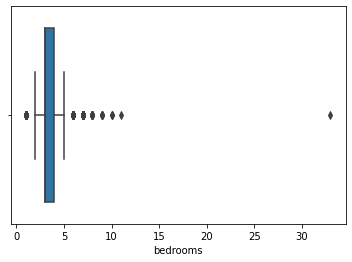

In [49]:
sns.boxplot(x=df['bedrooms']);

In [53]:
#Change outlier to 3 probably an entry error
df['bedrooms'].replace(33, 3, inplace=True)

#Remove the outlier 
# df = df[df['bedrooms'] != 33]

#### Encoding Categorical Variables

In [54]:
#Checking for categorical type variables
df.select_dtypes('object').sample(5)

,waterfront,view,condition,day_of_week
14772,NO,NONE,Average,Monday
3437,NO,FAIR,Average,Tuesday
3470,NO,NONE,Average,Friday
11466,NO,NONE,Average,Sunday
8411,NO,FAIR,Good,Friday


The view and waterfront columns using One Hot Encoding while the 'categorical' column was encoded using ordinal encoding

In [56]:
df = pd.get_dummies(df, columns=['waterfront', 'view'], dtype=int)

In [55]:
# Define the mapping of categories to numerical values
condition_mapping = {'Poor': 1,'Fair': 2,'Average': 3,'Good': 4,'Very Good': 5}

# Apply mapping to column
df['condition'] = df['condition'].map(condition_mapping)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   condition       21597 non-null  int64  
 8   grade           21597 non-null  int64  
 9   sqft_above      21597 non-null  int64  
 10  sqft_basement   21597 non-null  float64
 11  yr_built        21597 non-null  int64  
 12  yr_renovated    21597 non-null  float64
 13  zipcode         21597 non-null  int64  
 14  lat             21597 non-null  float64
 15  long            21597 non-null  float64
 16  sqft_living15   21597 non-null  int64  
 17  sqft_lot15      21597 non-null 

## <font color='goldenrod'>3. Exploratory Data Analysis(EDA)</font>

Text(0.5, 1.0, 'Histogram of Prices')

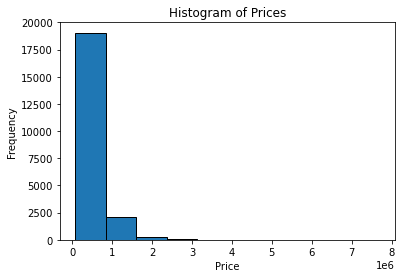

In [63]:
#Plotting histogram of price
plt.hist(df["price"], bins=10, edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Prices")
